# Import packages and Data :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('concrete.csv')

# Import packages and Data :

In [3]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
df.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


In [5]:
df.shape

(1030, 9)

In [6]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
df.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

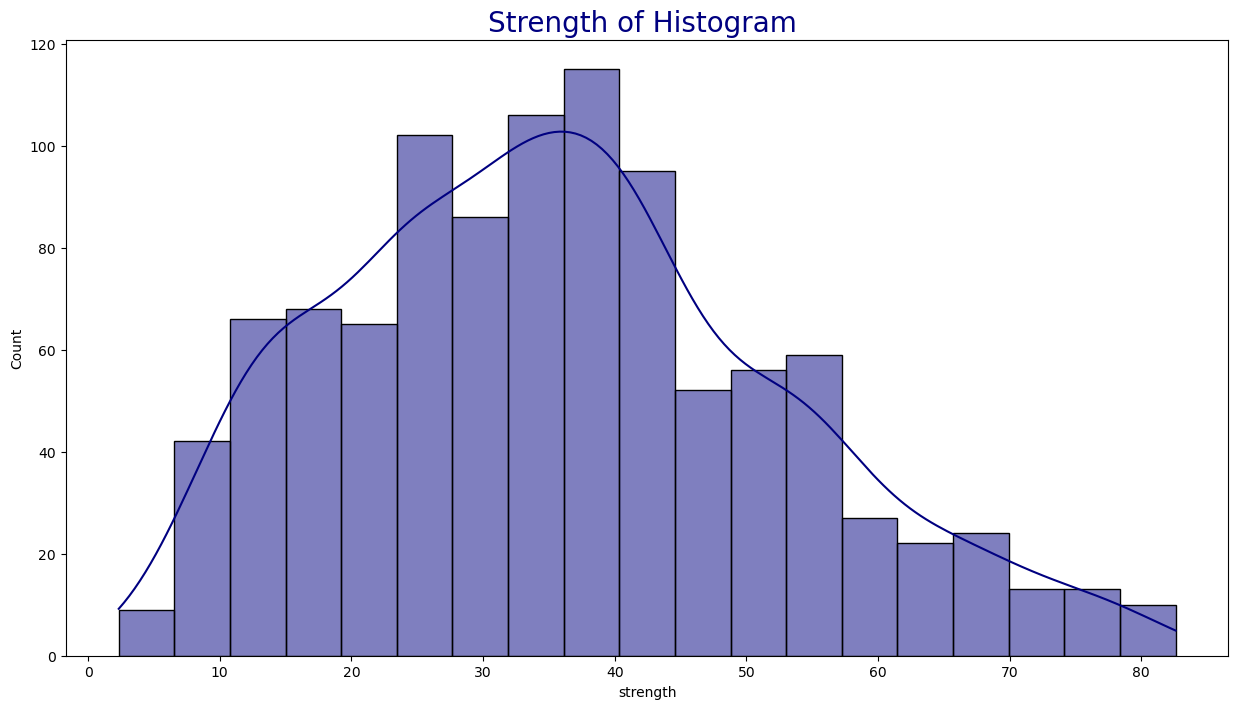

In [9]:
# the histogram show that the strength in the data set has a normal distabution

plt.figure(figsize=(15,8))
plt.title('Strength of Histogram ',color='navy',size=20)
sns.histplot(data=df,x='strength', kde=True,color='navy');

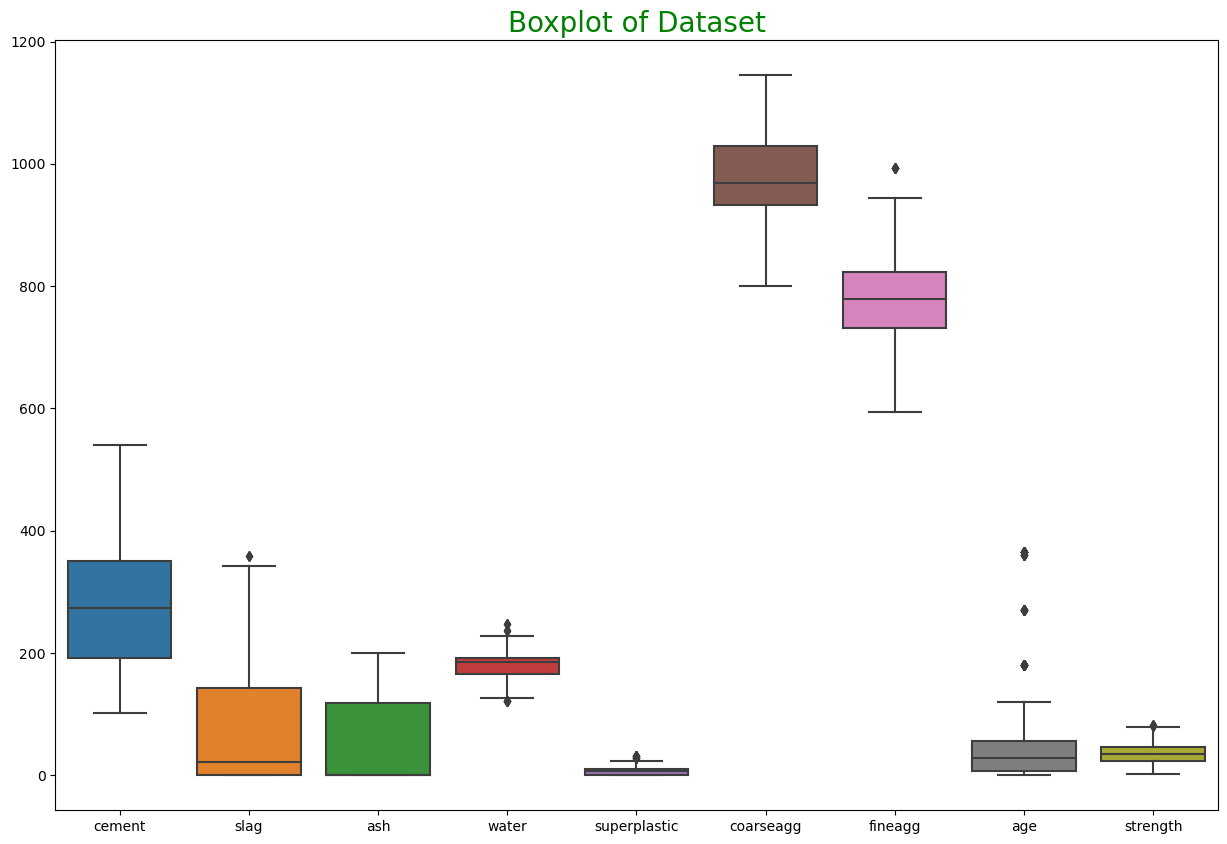

In [10]:
# As we can see, there are some outlier in the dataset

plt.figure(figsize=(15,10))
plt.title('Boxplot of Dataset',color='green',size=20)
sns.boxplot(data=df);

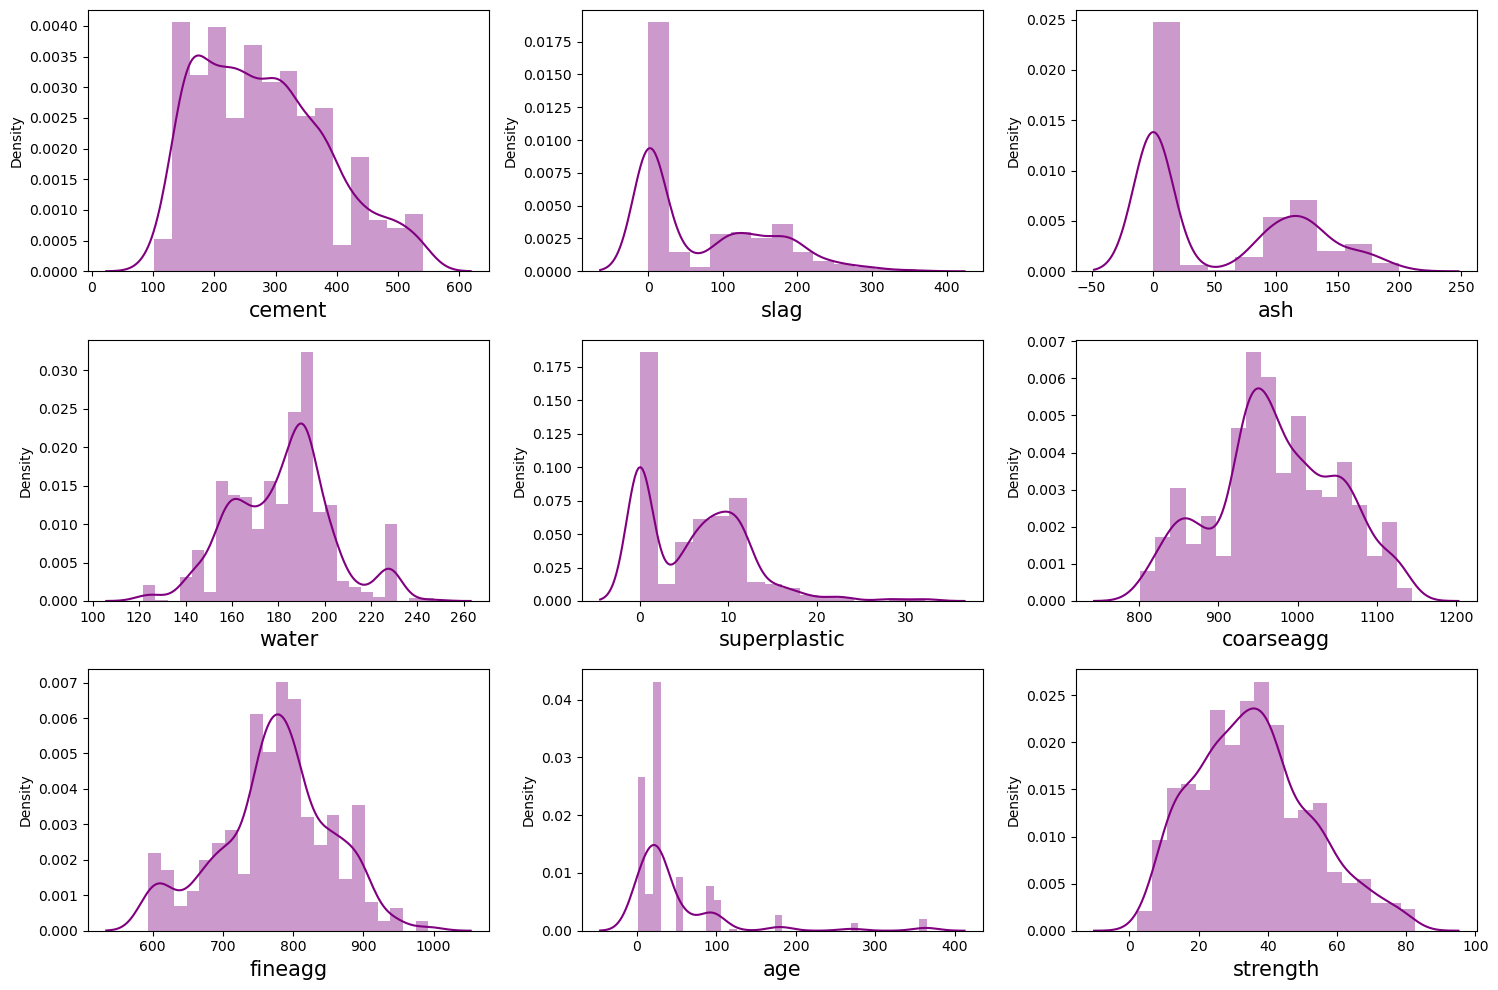

In [11]:
plt.figure(figsize = (15, 10))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 9: 
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(df[col],color='purple')
        plt.xlabel(col, fontsize = 15,color='black')
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [12]:
# creating feature and label

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

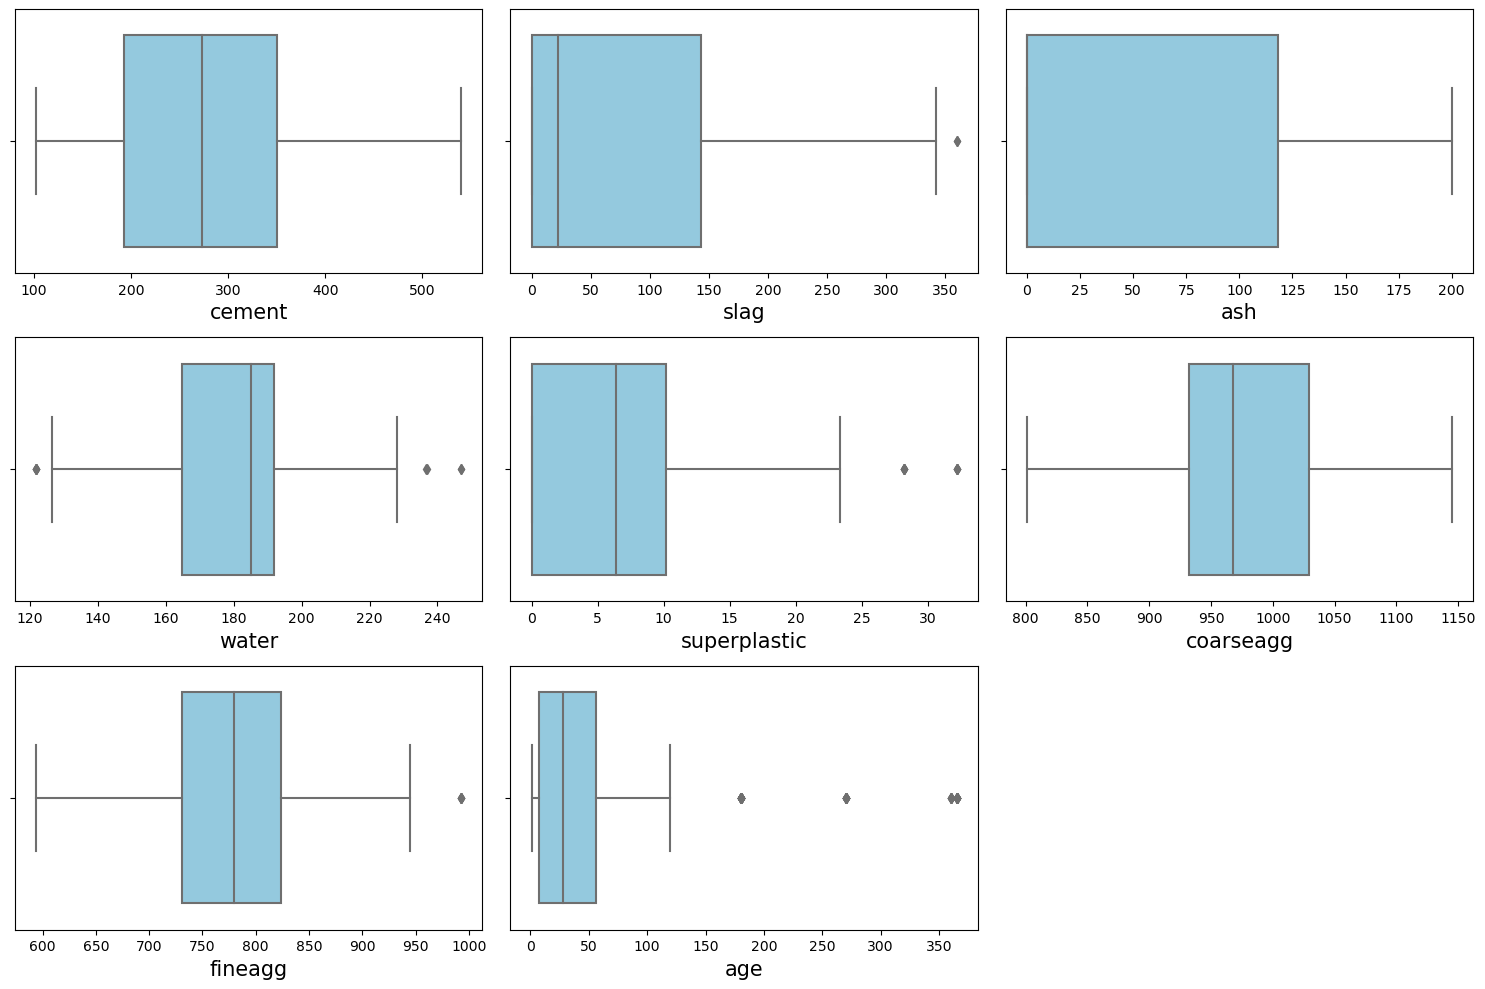

In [13]:
plt.figure(figsize = (15,10))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(X[col],color='skyblue')
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

In [14]:
df[df['slag'] > 350]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
918,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42


In [15]:
df = df.drop(df[df['slag'] > 350].index)

In [16]:
df['water'].describe()

count    1028.000000
mean      181.559241
std        21.374222
min       121.800000
25%       164.900000
50%       185.000000
75%       192.000000
max       247.000000
Name: water, dtype: float64

In [17]:
df = df.drop(df[(df['water'] < 122) | (df['water'] > 230)].index)

In [18]:
df['superplastic'].describe()

count    1019.000000
mean        6.220314
std         5.999582
min         0.000000
25%         0.000000
50%         6.500000
75%        10.300000
max        32.200000
Name: superplastic, dtype: float64

In [19]:
df[df['superplastic'] > 25]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
44,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2
156,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
232,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
292,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
538,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
744,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
816,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9
838,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
955,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3


In [20]:
df = df.drop(df[df['superplastic'] > 25].index)

In [21]:
df['fineagg'].describe()

count    1009.000000
mean      773.226759
std        80.028615
min       594.000000
25%       732.600000
50%       779.300000
75%       822.200000
max       992.600000
Name: fineagg, dtype: float64

In [22]:
df[(df['fineagg'] < 600) | (df['fineagg'] > 950)]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
13,237.5,237.5,0.0,228.0,0.0,932.0,594.0,7,26.26
16,237.5,237.5,0.0,228.0,0.0,932.0,594.0,28,30.08
31,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29
64,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
93,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
99,237.5,237.5,0.0,228.0,0.0,932.0,594.0,180,36.25
129,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.50
142,332.5,142.5,0.0,228.0,0.0,932.0,594.0,90,37.72
149,380.0,95.0,0.0,228.0,0.0,932.0,594.0,270,41.15
241,427.5,47.5,0.0,228.0,0.0,932.0,594.0,90,41.54


In [23]:
df = df.drop(df[(df['fineagg'] < 600) | (df['fineagg'] > 950)].index)

In [24]:
df['age'].describe()

count    974.000000
mean      42.534908
std       57.342683
min        1.000000
25%        7.000000
50%       28.000000
75%       56.000000
max      365.000000
Name: age, dtype: float64

In [25]:
df[df['age'] > 150]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
51,331.0,0.0,0.0,192.0,0.0,978.0,825.0,180,39.00
103,380.0,0.0,0.0,228.0,0.0,932.0,670.0,180,53.10
133,236.0,0.0,0.0,193.0,0.0,968.0,885.0,365,25.08
144,302.0,0.0,0.0,203.0,0.0,974.0,817.0,180,26.74
152,322.0,0.0,0.0,203.0,0.0,974.0,800.0,180,29.59
157,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
159,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,55.26
198,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365,52.91
199,277.0,0.0,0.0,191.0,0.0,968.0,856.0,180,32.33
207,190.0,190.0,0.0,228.0,0.0,932.0,670.0,180,46.93


In [26]:
df = df.drop(df[df['age'] > 150].index)

In [27]:
df['strength'].describe()

count    930.000000
mean      35.074548
std       16.953394
min        2.330000
25%       22.492500
50%       33.400000
75%       45.352500
max       82.600000
Name: strength, dtype: float64

In [28]:
df[df['strength'] > 79]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
192,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28,81.75
245,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
257,389.9,189.0,0.0,145.9,22.0,944.7,755.8,56,79.40
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
732,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
733,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
766,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
950,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91,82.60
1003,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56,80.20


In [29]:
df = df.drop(df[df['strength'] > 79].index)

In [30]:
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1023,141.3,212.0,0.0,203.5,0.0,971.8,748.5,7,10.39
1024,297.2,0.0,117.5,174.8,9.5,1022.8,753.5,3,21.91
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28


In [31]:
df.shape

(921, 9)

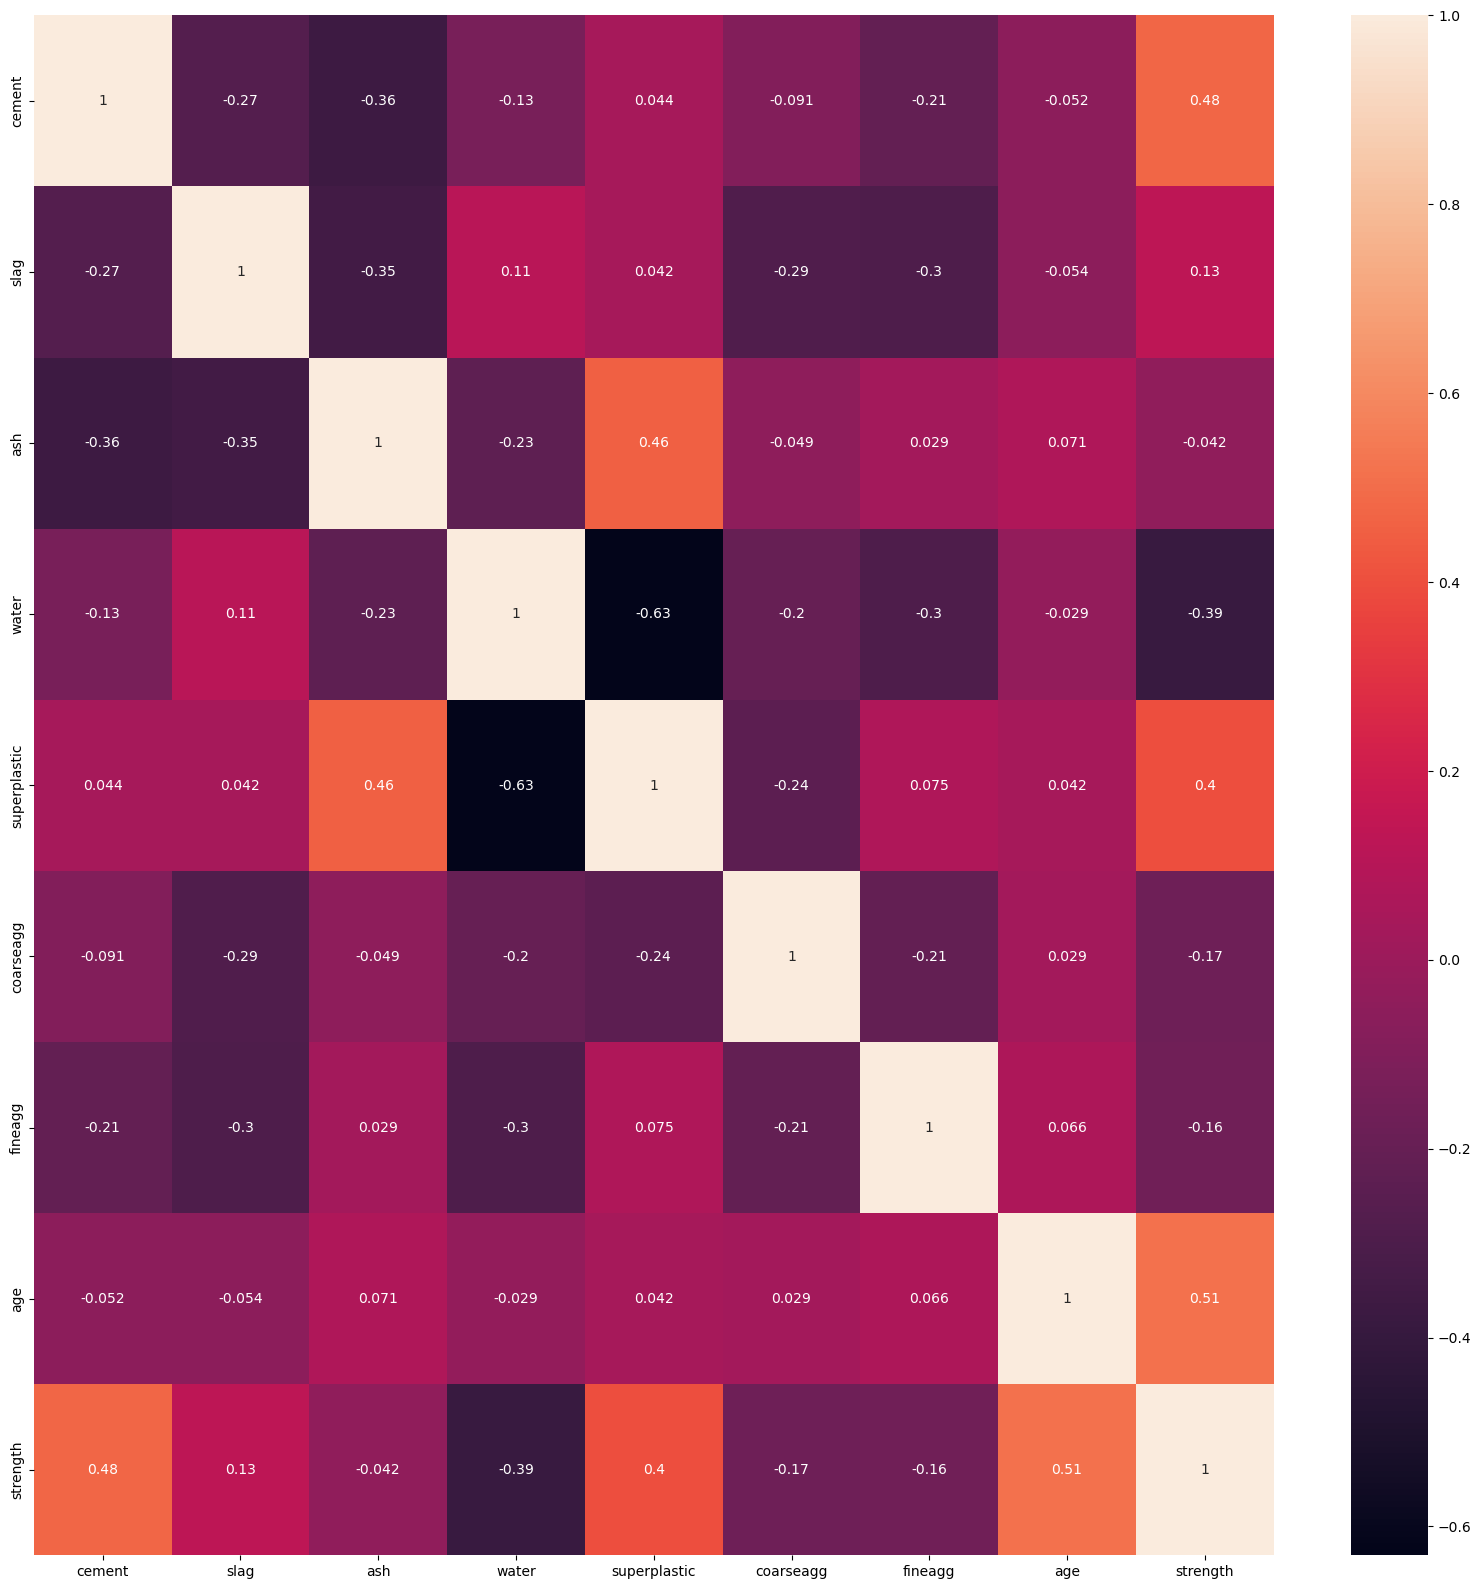

In [32]:
plt.figure(figsize=(20,20))
sns.heatmap(data=df.corr(), annot=True);

In [33]:
# As we can see, the strenght have a strong postive correlation to the following:superplastic,cement & age and a negitive correaltion to:water

df.corr()['strength'].sort_values()[:-1]

water          -0.385794
coarseagg      -0.165909
fineagg        -0.161633
ash            -0.042227
slag            0.129455
superplastic    0.398849
cement          0.476464
age             0.509746
Name: strength, dtype: float64

In [34]:
X = df.drop('strength', axis=1)
y = df['strength']

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [36]:
X_train.shape,X_test.shape

((736, 8), (185, 8))

In [37]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

# fit the Scaler to the train set , it will learn the parameters
scaler.fit(X_train)

# Transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled =scaler.transform(X_test)

In [38]:
scaler.mean_

array([273.42282609,  71.60584239,  58.75271739, 180.14008152,
         6.2201087 , 976.7951087 , 780.10855978,  31.14266304])

# Preparing Data for ML :

Linear Regression :

In [39]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [40]:
lr.score(X_train, y_train)

0.7578353352747466

In [41]:
lr.score(X_test, y_test)

0.7831783889754216

In [42]:
# Cross Checking with Cross validation Score 

from sklearn.model_selection import cross_val_score
LR = LinearRegression()
np.mean(cross_val_score(LR,X,y,scoring ='r2'))

0.7523563516969096

Lasso Regression :

In [43]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression

from sklearn.metrics import r2_score

In [44]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 10000)
lassocv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=10000)

In [45]:
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=0.7469196878544425)

In [46]:
lasso.score(X_train, y_train)

0.7576949559690545

In [47]:
lasso.score(X_test, y_test)

0.7828124109342773

Decision Tree Regressor :

In [48]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [49]:
dtr.score(X_train, y_train)

0.9949408378103444

In [50]:
dtr.score(X_test, y_test)

0.8374787466492402

In [51]:
# Hyper Parameter Tuning Decision Tree Regressor

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['mse', 'friedman_mse', 'mae'],
    'splitter' : ['best', 'random'],
    'max_depth' : [3, 5, 7, 9, 10],
    'min_samples_split' : [1, 2, 3, 4, 5],
    'min_samples_leaf' : [1, 2, 3, 4, 5]
}

grid_search = GridSearchCV(dtr, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 750 candidates, totalling 3750 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [3, 5, 7, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             verbose=1)

In [52]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'friedman_mse', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.80890377343601


In [53]:
dtr = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth = 10, min_samples_leaf = 1, min_samples_split = 2, splitter = 'random')
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, splitter='random')

In [54]:
dtr.score(X_train, y_train)

0.9583057215577301

In [55]:
dtr.score(X_test, y_test)

0.8213542624650164

Random Forest Regressor :

In [56]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [57]:
rfr.score(X_train, y_train)

0.9817827100913117

In [58]:
rfr.score(X_test, y_test)

0.9133490467261481

VotingRegressor :

In [59]:
from sklearn.ensemble import VotingRegressor

regressors = [('Linear Regression', lr), ('Lasso Regression', lasso), ('Decision Tree', dtr), ('Random Forest', rfr)]

vr = VotingRegressor(estimators = regressors, n_jobs = -1, verbose = 1, weights = (0.1, 0.1, 0.1, 0.2))
vr.fit(X_train, y_train)

VotingRegressor(estimators=[('Linear Regression', LinearRegression()),
                            ('Lasso Regression',
                             Lasso(alpha=0.7469196878544425)),
                            ('Decision Tree',
                             DecisionTreeRegressor(criterion='friedman_mse',
                                                   max_depth=10,
                                                   splitter='random')),
                            ('Random Forest', RandomForestRegressor())],
                n_jobs=-1, verbose=1, weights=(0.1, 0.1, 0.1, 0.2))

In [60]:
vr.score(X_train, y_train)

0.9415237135964207

In [61]:
vr.score(X_test, y_test)

0.9040912540177979

In [62]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest','VotingRegressor'],
    'Score' : [lr.score(X_test, y_test), lasso.score(X_test, y_test), dtr.score(X_test, y_test), rfr.score(X_test, y_test),vr.score(X_test, y_test)]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest,0.913349
4,VotingRegressor,0.904091
2,Decision Tree,0.821354
0,Linear Regression,0.783178
1,Lasso Regression,0.782812


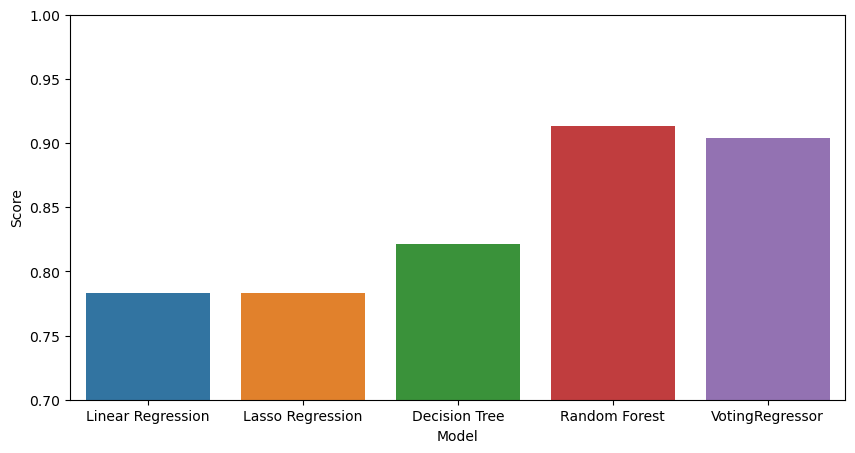

In [63]:
plt.figure(figsize = (10, 5))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.ylim(0.70, 1)
plt.show()